In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [42]:
# Directory containing the Excel files
directory = "../datas/excels"  # Please correct this path based on your actual directory structure

# Lists to store aggregated data
ages = []
genders = []
departments = []
points = []
image_data = []


# Function to process each Excel file
def process_excel_file(filepath):
    df = pd.read_excel(filepath)
    try:
        age = int(df[df.iloc[:, 0] == "Age"].iloc[0, 1])
        gender = df[df.iloc[:, 0] == "Gender"].iloc[0, 1]
        department = df[df.iloc[:, 0] == "Department"].iloc[0, 1]
        total_points = int(df[df.iloc[:, 0] == "Total Points"].iloc[0, 1])

        image_data_rows = df.iloc[8:41, :5]
        image_data_rows.columns = ["Image Name", "Given Answer", "Correct Answer", "Points", "Match"]
        image_data_rows["Age"] = age
        image_data_rows["Gender"] = gender
        image_data_rows["Department"] = department

        ages.append(age)
        genders.append(gender)
        departments.append(department)
        points.append(total_points)
        image_data.append(image_data_rows)

    except ValueError as e:
        print(f"Error processing file {filepath}: {e}")
        print(df.head())  # Print the first few rows for debugging


# Process all Excel files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".xlsx"):
        filepath = os.path.join(directory, filename)
        process_excel_file(filepath)

# Create DataFrames for aggregated data
df_aggregated = pd.DataFrame({"Age": ages, "Gender": genders, "Department": departments})
df_users = pd.DataFrame({"Age": ages, "Gender": genders, "Department": departments, "Total Points": points})
df_images = pd.concat(image_data, ignore_index=True)

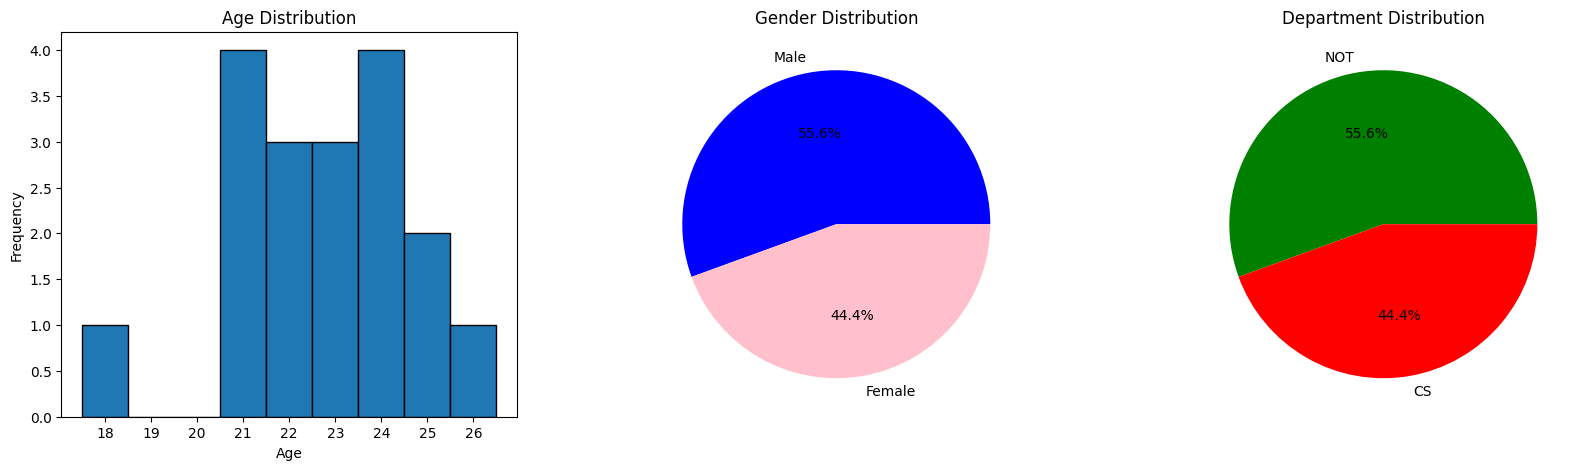

In [43]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

age_bins = np.arange(min(df_aggregated["Age"]) - 0.5, max(df_aggregated["Age"]) + 1.5, 1)  # Adjust the bin range and width
age_counts, _ = np.histogram(df_aggregated["Age"], bins=age_bins)

axes[0].bar(age_bins[:-1], age_counts, align="edge", width=1, edgecolor="black")
axes[0].set_title("Age Distribution")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Frequency")
axes[0].set_xticks(age_bins[:-1] + 0.5)

# Gender distribution
gender_counts = df_aggregated["Gender"].value_counts()
axes[1].pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", colors=["blue", "pink"])
axes[1].set_title("Gender Distribution")

# Department distribution
department_counts = df_aggregated["Department"].value_counts()
axes[2].pie(department_counts, labels=department_counts.index, autopct="%1.1f%%", colors="green")
axes[2].set_title("Department Distribution")

plt.show()

In [44]:
print("User Data:")
print(df_users)
print("\nImage Data:")
print(df_images)

User Data:
    Age  Gender Department  Total Points
0    24    Male         CS            -2
1    24    Male        NOT            -6
2    21  Female        NOT             2
3    22  Female         CS            -3
4    26    Male         CS            -9
5    24    Male        NOT             2
6    21  Female        NOT           -14
7    25  Female        NOT            -6
8    21    Male        NOT             9
9    21  Female        NOT             2
10   22    Male         CS            17
11   24    Male        NOT             9
12   23    Male         CS            12
13   18    Male        NOT            -8
14   23    Male         CS             6
15   22  Female         CS             3
16   23  Female        NOT            -4
17   25  Female         CS            24

Image Data:
               Image Name      Given Answer Correct Answer Points Match  Age  \
0         ai-no-loss4.png         Likely AI             AI      1   Yes   24   
1    ai-photo-reward5.png          No

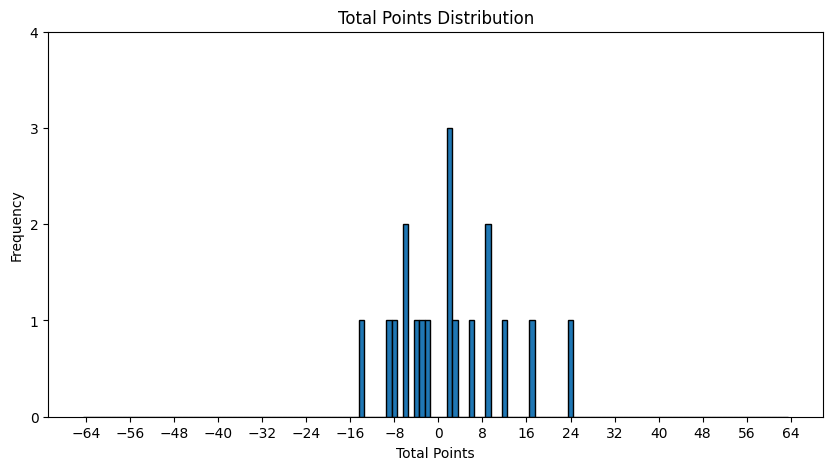

In [45]:
# Create bins with edges that ensure the bars are centered around their values
bins = [i - 0.5 for i in range(-64, 65)]

plt.figure(figsize=(10, 5))
plt.hist(df_users["Total Points"], bins=bins, edgecolor="black", align="mid")
plt.title("Total Points Distribution")
plt.xlabel("Total Points")
plt.ylabel("Frequency")
plt.xticks(range(-64, 65, 8))  # Set x-ticks to match the center of each bin

# Adjust y-ticks
plt.yticks(range(0, int(df_users["Total Points"].value_counts().max()) + 2))

plt.show()

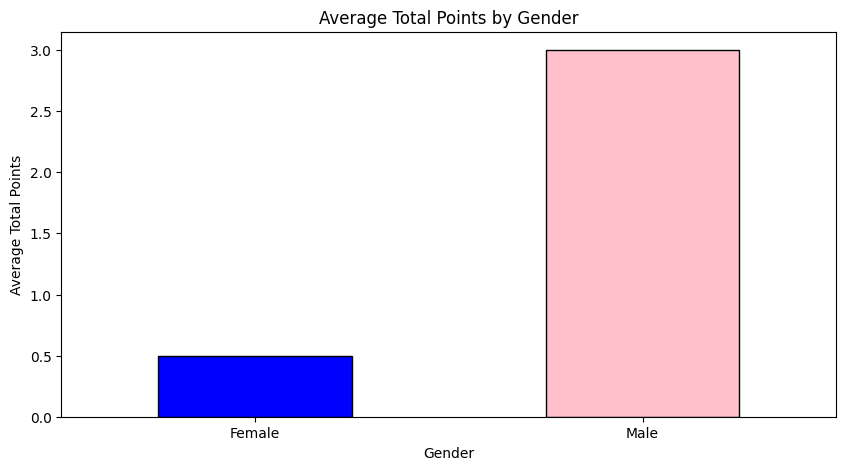

In [46]:
plt.figure(figsize=(10, 5))
df_users.groupby("Gender")["Total Points"].mean().plot(kind="bar", color=["blue", "pink"], edgecolor="black")
plt.title("Average Total Points by Gender")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.ylabel("Average Total Points")
plt.show()

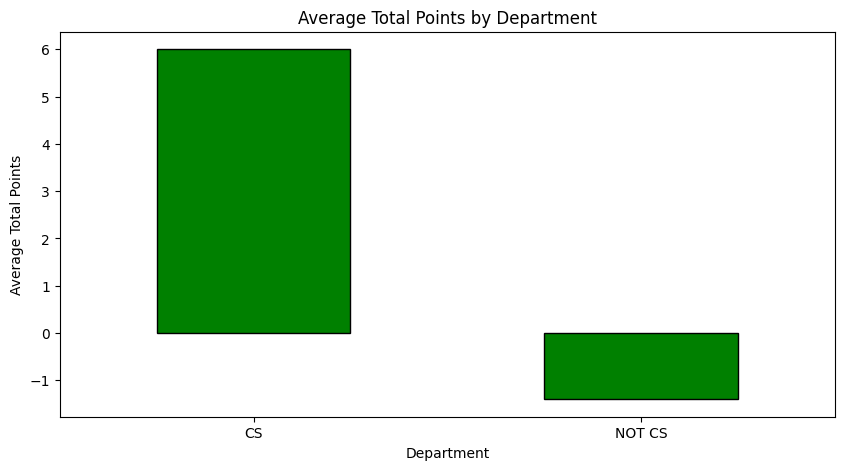

In [47]:
plt.figure(figsize=(10, 5))
df_users.groupby("Department")["Total Points"].mean().plot(kind="bar", color="green", edgecolor="black")
plt.title("Average Total Points by Department")
plt.xlabel("Department")
new_xticks = ["CS", "NOT CS"]
plt.xticks(range(len(new_xticks)), new_xticks, rotation=0)
plt.ylabel("Average Total Points")
plt.show()

<Figure size 1000x500 with 0 Axes>

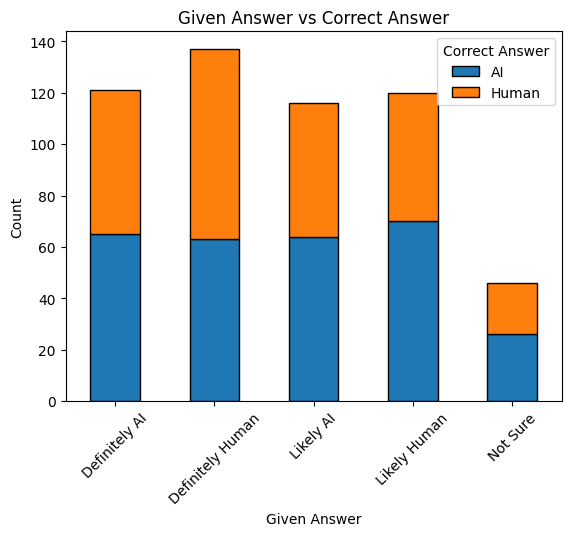

In [48]:
plt.figure(figsize=(10, 5))
df_images.groupby(["Given Answer", "Correct Answer"]).size().unstack().plot(kind="bar", stacked=True, edgecolor="black")
plt.title("Given Answer vs Correct Answer")
plt.xlabel("Given Answer")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()

<Figure size 1000x500 with 0 Axes>

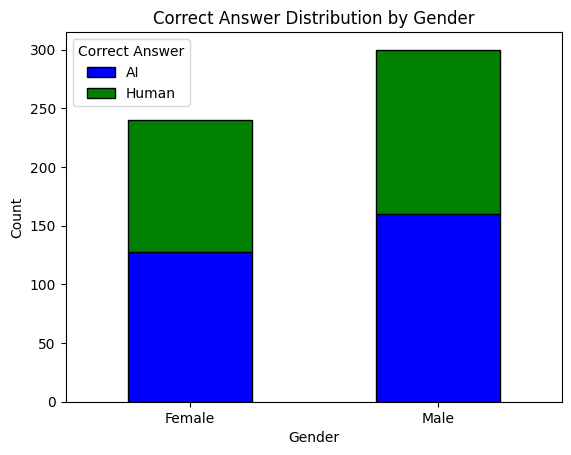

In [49]:
plt.figure(figsize=(10, 5))
df_images.groupby(["Gender", "Correct Answer"]).size().unstack().plot(kind="bar", stacked=True, color=["blue", "green"], edgecolor="black")
plt.title("Correct Answer Distribution by Gender")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

<Figure size 1000x500 with 0 Axes>

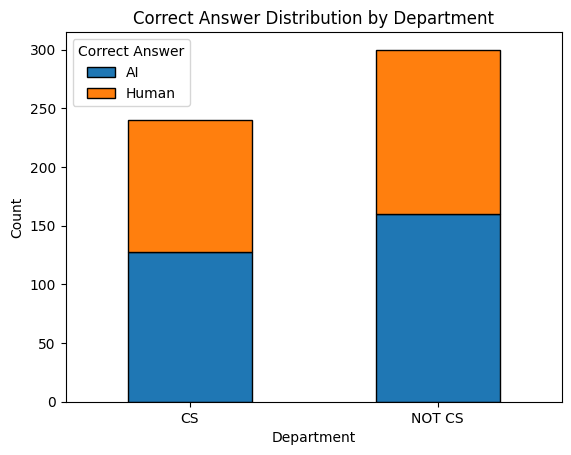

In [50]:
plt.figure(figsize=(10, 5))
df_images.groupby(["Department", "Correct Answer"]).size().unstack().plot(kind="bar", stacked=True, edgecolor="black")
plt.title("Correct Answer Distribution by Department")
plt.xlabel("Department")
new_xticks = ["CS", "NOT CS"]
plt.xticks(range(len(new_xticks)), new_xticks, rotation=0)
plt.ylabel("Count")
plt.show()

In [51]:
# Directory containing the Excel files
directory_path = "../datas/excels/"

# Load all Excel files from the specified directory
all_data = []
for filename in os.listdir(directory_path):
    if filename.endswith(".xlsx") and not filename.startswith("~$"):
        file_path = os.path.join(directory_path, filename)

        # Load the metadata from the initial rows
        metadata = pd.read_excel(file_path, nrows=3)

        # Extract gender and department from metadata
        gender = metadata.iloc[1, 1]
        department = metadata.iloc[2, 1]

        # Load the data again, skipping the initial metadata rows
        data = pd.read_excel(file_path, skiprows=4)

        # Rename columns for easier access
        data.columns = ["Image Name", "Given Answer", "Correct Answer", "Points", "Match"]

        # Add the extracted metadata to the main dataframe
        data["Gender"] = gender
        data["Department"] = department

        all_data.append(data)

# Concatenate all the data into a single DataFrame
combined_data = pd.concat(all_data, ignore_index=True)


# Define a function to calculate the statistics for each image
def calculate_statistics_corrected(df):
    results = []

    for image_name in df["Image Name"].unique():
        if pd.isna(image_name) or image_name == "Image Name" or image_name == "Total Points":
            continue

        image_data = df[df["Image Name"] == image_name]
        total_responses = len(image_data)
        total_female_responses = len(image_data[image_data["Gender"] == "Female"])
        total_male_responses = len(image_data[image_data["Gender"] == "Male"])
        total_cs_responses = len(image_data[image_data["Department"] == "CS"])
        total_not_cs_responses = len(image_data[image_data["Department"] != "CS"])
        total_female_cs_responses = len(image_data[(image_data["Gender"] == "Female") & (image_data["Department"] == "CS")])
        total_female_not_cs_responses = len(image_data[(image_data["Gender"] == "Female") & (image_data["Department"] != "CS")])
        total_male_cs_responses = len(image_data[(image_data["Gender"] == "Male") & (image_data["Department"] == "CS")])
        total_male_not_cs_responses = len(image_data[(image_data["Gender"] == "Male") & (image_data["Department"] != "CS")])

        female_correct = len(image_data[(image_data["Gender"] == "Female") & (image_data["Match"] == "Yes")])
        male_correct = len(image_data[(image_data["Gender"] == "Male") & (image_data["Match"] == "Yes")])
        cs_correct = len(image_data[(image_data["Department"] == "CS") & (image_data["Match"] == "Yes")])
        not_cs_correct = len(image_data[(image_data["Department"] != "CS") & (image_data["Match"] == "Yes")])
        female_cs_correct = len(image_data[(image_data["Gender"] == "Female") & (image_data["Department"] == "CS") & (image_data["Match"] == "Yes")])
        female_not_cs_correct = len(
            image_data[(image_data["Gender"] == "Female") & (image_data["Department"] != "CS") & (image_data["Match"] == "Yes")]
        )
        male_cs_correct = len(image_data[(image_data["Gender"] == "Male") & (image_data["Department"] == "CS") & (image_data["Match"] == "Yes")])
        male_not_cs_correct = len(image_data[(image_data["Gender"] == "Male") & (image_data["Department"] != "CS") & (image_data["Match"] == "Yes")])

        female_correct_ratio = female_correct / total_female_responses if total_female_responses else 0
        male_correct_ratio = male_correct / total_male_responses if total_male_responses else 0
        cs_correct_ratio = cs_correct / total_cs_responses if total_cs_responses else 0
        not_cs_correct_ratio = not_cs_correct / total_not_cs_responses if total_not_cs_responses else 0
        female_cs_correct_ratio = female_cs_correct / total_female_cs_responses if total_female_cs_responses else 0
        female_not_cs_correct_ratio = female_not_cs_correct / total_female_not_cs_responses if total_female_not_cs_responses else 0
        male_cs_correct_ratio = male_cs_correct / total_male_cs_responses if total_male_cs_responses else 0
        male_not_cs_correct_ratio = male_not_cs_correct / total_male_not_cs_responses if total_male_not_cs_responses else 0

        results.append(
            {
                "Image Name": image_name,
                "Female Correct Ratio": round(female_correct_ratio * 100, 2),
                "Male Correct Ratio": round(male_correct_ratio * 100, 2),
                "CS Correct Ratio": round(cs_correct_ratio * 100, 2),
                "Not CS Correct Ratio": round(not_cs_correct_ratio * 100, 2),
                "Female CS Correct Ratio": round(female_cs_correct_ratio * 100, 2),
                "Female Not CS Correct Ratio": round(female_not_cs_correct_ratio * 100, 2),
                "Male CS Correct Ratio": round(male_cs_correct_ratio * 100, 2),
                "Male Not CS Correct Ratio": round(male_not_cs_correct_ratio * 100, 2),
            }
        )

    return pd.DataFrame(results)


# Calculate the statistics
corrected_statistics = calculate_statistics_corrected(combined_data)

# Sort the dataframe by the "Image Name" column
corrected_statistics = corrected_statistics.sort_values(by="Image Name")

# Add a row named "Total" and calculate the average
total_row = round(corrected_statistics.mean(numeric_only=True, skipna=True).to_frame().T, 2)
total_row["Image Name"] = "Total"
corrected_statistics = pd.concat([corrected_statistics, total_row], ignore_index=True)

# Save the dataframe to a new Excel file
output_file_path = "image_statistics.xlsx"
corrected_statistics.to_excel(output_file_path, index=False)

print(f"Statistics saved to {output_file_path}")

Statistics saved to image_statistics.xlsx


In [33]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the categories and columns
categories = ["Definitely Human", "Likely Human", "Not Sure", "Likely AI", "Definitely AI"]
columns = ["Image Reward Based", "Image Loss Based", "NonImage Reward Based", "NonImage Loss Based"]

# Directory containing the Excel files
directory = "../datas/excels"

# Initialize an empty list to store data
data_list = []

# Iterate over all files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".xlsx") or filename.endswith(".xls"):
        # Read the Excel file
        file_path = os.path.join(directory, filename)
        df = pd.read_excel(file_path, skiprows=7)  # Assuming the relevant data starts from the 8th row
        
        # Filter rows where 'Image Name' starts with 'r-'
        df_filtered = df[df['Name'].str.startswith('r-')]
        
        # Process the filtered data and append to the data list
        for _, row in df_filtered.iterrows():
            image_name = row['Image Name']
            given_answer = row['Given Answer']
            if 'reward' in image_name:
                column = "Image Reward Based"
            elif 'loss' in image_name:
                column = "Image Loss Based"
            elif 'reward' not in image_name:
                column = "NonImage Reward Based"
            else:
                column = "NonImage Loss Based"
            
            data_list.append([given_answer, column])

# Convert the data list to a DataFrame
df_data = pd.DataFrame(data_list, columns=['Category', 'Type'])

# Calculate the proportions for each category and type
data = df_data.pivot_table(index='Category', columns='Type', aggfunc=len, fill_value=0)
data = data.div(data.sum(axis=0), axis=1)

# Create the DataFrame for the plot
df_plot = pd.DataFrame(data, index=categories, columns=columns).fillna(0)

# Define colors for each category
colors = {"Definitely Human": "green", "Likely Human": "lightgreen", "Not Sure": "yellow", "Likely AI": "coral", "Definitely AI": "red"}

# Create the cumulative bar chart
fig, ax = plt.subplots(figsize=(6, 6))  # Adjust the width of the figure
bottom = np.zeros(len(columns))
bar_width = 0.7  # Adjust the width of the bars

for category in categories:
    bars = ax.bar(columns, df_plot.loc[category], bottom=bottom, label=category, width=bar_width, edgecolor="white", color=colors[category])
    bottom += df_plot.loc[category]
    # Add percentage labels
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.annotate(
                f"{height * 100:.1f}%",
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                ha="center",
                va="center",
                fontsize=8,
                color="black",
            )

# Customize the chart
ax.set_ylabel("Cumulative Percent")
ax.legend(title="Category", loc="center left", bbox_to_anchor=(1, 0.5))  # Move legend to the right
ax.set_title("Responses to Real Mails")

# Display the chart
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()


KeyError: 'Name'

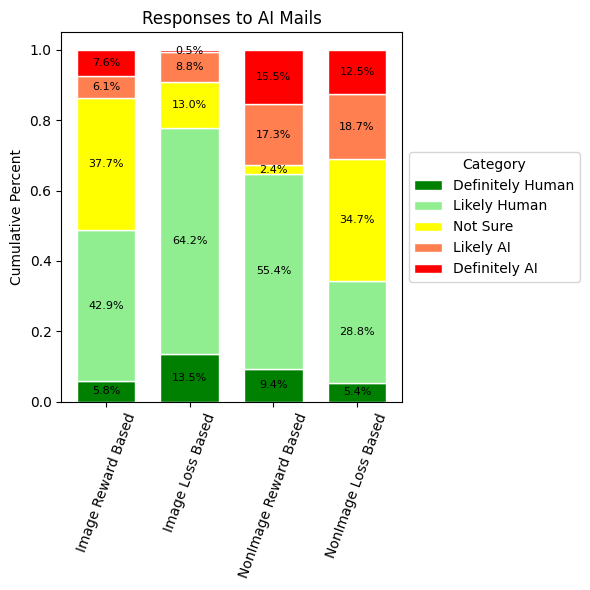

In [30]:
# Define the categories and columns
categories = ["Definitely Human", "Likely Human", "Not Sure", "Likely AI", "Definitely AI"]
columns = ["Image Reward Based", "Image Loss Based", "NonImage Reward Based", "NonImage Loss Based"]

# Generate dummy data
data = np.random.dirichlet(np.ones(len(categories)), size=len(columns)).T

# Create DataFrame
df = pd.DataFrame(data, index=categories, columns=columns)

# Define colors for each category
colors = {"Definitely Human": "green", "Likely Human": "lightgreen", "Not Sure": "yellow", "Likely AI": "coral", "Definitely AI": "red"}

# Create the cumulative bar chart
fig, ax = plt.subplots(figsize=(6, 6))  # Adjust the width of the figure
bottom = np.zeros(len(columns))
bar_width = 0.7  # Adjust the width of the bars

for category in categories:
    bars = ax.bar(columns, df.loc[category], bottom=bottom, label=category, width=bar_width, edgecolor="white", color=colors[category])
    bottom += df.loc[category]
    # Add percentage labels
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.annotate(
                f"{height * 100:.1f}%",
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                ha="center",
                va="center",
                fontsize=8,
                color="black",
            )

# Customize the chart
ax.set_ylabel("Cumulative Percent")
ax.legend(title="Category", loc="center left", bbox_to_anchor=(1, 0.5))  # Move legend to the right
ax.set_title("Responses to AI Mails")

# Display the chart
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()